#### Title

Titanic: Machine Learning From Disaster

##### Objective

The goal is to build machine learning models that can predict if a passenger survives from their attributes.  

##### Data Set

The data set was compiled by Kaggle, which can be downloaded by navigating to the [data download page](https://www.kaggle.com/c/titanic/data).

#### Introduction To The Data Set

We'll be working with a data set of the passengers of the titanic. The titanic shipwreck is the most famous shipwreck in history and led to the creation of better safety regulations for ships.

The data for the passengers is contained in two files:
* **train.csv** :  Contains data on 712 passengers
* **test.csv**: Conatins data on 418 passengers

Each row in both data sets represents a passenger on the Titanic, and some information about them. Here are descriptions for each of the columns in train.csv.


| Column      | Definition |
| :---------- | :--------- |
| PassengerId | A numerical id assigned to each passenger.|
| Survived    | Whether the passenger survived (1), or didn't (0).|
| Pclass       | The class the passenger was in. |
| Name    |  The name of the passenger.        |
| Sex       | The gender of the passenger -- male or female.|
| Age    | The age of the passenger. Fractional.|
| SibSp  |The number of siblings and spouses the passenger had on board.|
| Parch    |The number of parents and children the passenger had on board.|
| Ticket   | The ticket number of the passenger. |
| Fare     | How much the passenger paid for the ticket.|
| Cabin    | Which cabin the passenger was in.|
| Embarked | Where the passenger boarded the Titanic.|

Here's what the first few rows look like

In [2]:
%matplotlib inline
import pandas as pd
import matplotlib.pyplot as plt

titanic = pd.read_csv('../../datasets/train.csv')
titanic.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


#### Data Cleaning

Since we don't have a way to visualize, we will remove columns **Name** and **Ticket**.

We also need to remove any rows containing missing values.

In [3]:
columns = ['Survived', 'Pclass', 'Sex', 'Age', 'SibSp', 'Parch', 
           'Fare', 'Embarked']
titanic = titanic[columns].dropna()
titanic.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 712 entries, 0 to 890
Data columns (total 8 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   Survived  712 non-null    int64  
 1   Pclass    712 non-null    int64  
 2   Sex       712 non-null    object 
 3   Age       712 non-null    float64
 4   SibSp     712 non-null    int64  
 5   Parch     712 non-null    int64  
 6   Fare      712 non-null    float64
 7   Embarked  712 non-null    object 
dtypes: float64(2), int64(4), object(2)
memory usage: 50.1+ KB


#### Creating Histograms In Seaborn

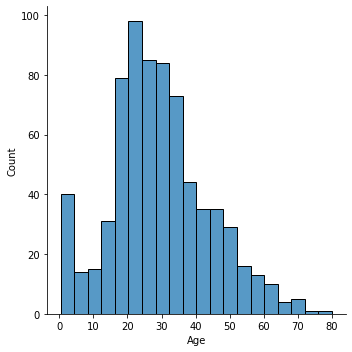

In [13]:
import seaborn as sns
import matplotlib.pyplot as plt

# Deprecated
# sns.distplot(titanic['Age'])

sns.displot(titanic['Age'])
#sns.histplot(titanic['Age'])
plt.show()

#### Generating A Kernel Density Plot

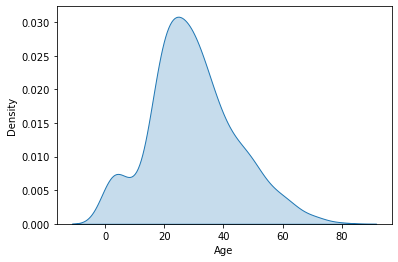

In [12]:
# Kernel Density Plot
sns.kdeplot(titanic['Age'], shade=True)
plt.xlabel('Age')
plt.show()

#### Modifying The Appearance Of The Plots

Text(0.5, 0, 'Age')

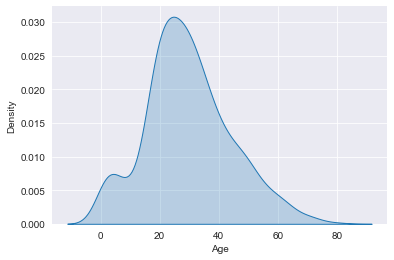

In [14]:
sns.set_style('darkgrid')
sns.kdeplot(titanic['Age'], shade=True)
sns.despine(left=True, bottom=True)
plt.xlabel('Age')

#### Conditional Distributions Using A Single Condition

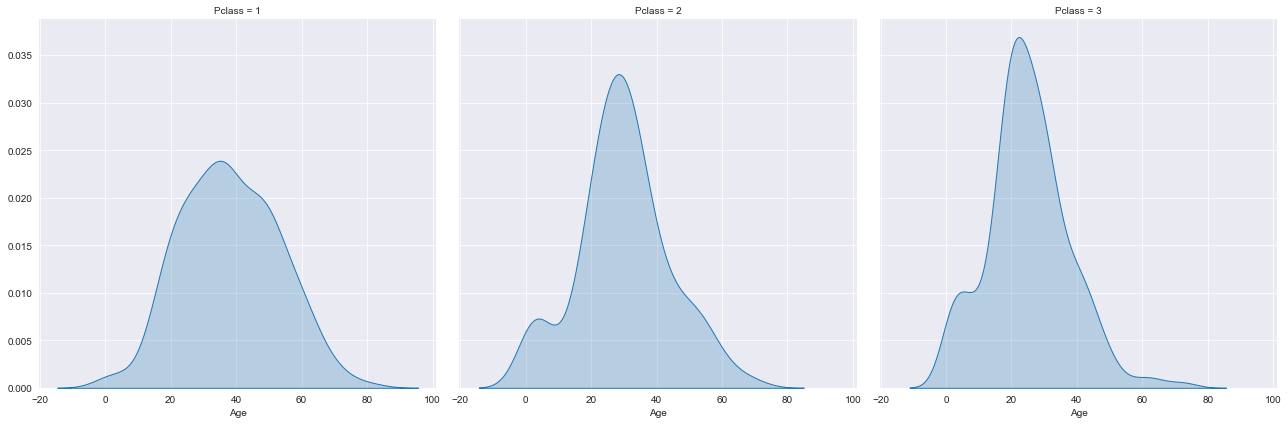

In [16]:
g = sns.FacetGrid(titanic, col='Pclass', height=6)
g.map(sns.kdeplot, 'Age', shade=True)
sns.despine(left=True, bottom=True)
plt.show()

#### Creating ConditionalPlots Using Two Conditions

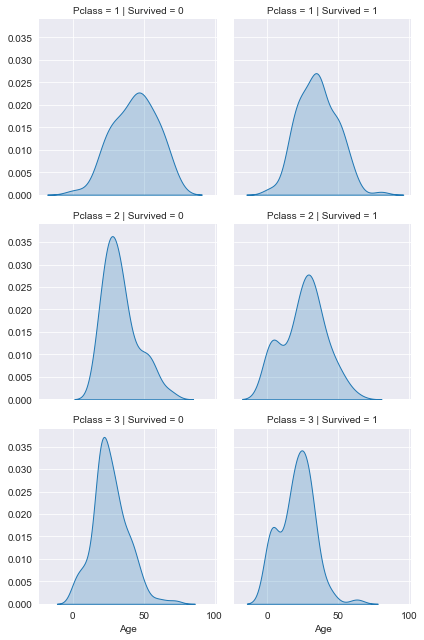

In [23]:
g = sns.FacetGrid(titanic, col='Survived', row='Pclass')
# Histogram
#g.map(sns.histplot, 'Age')
# KDE-Plot
g.map(sns.kdeplot, 'Age', shade=True)
sns.despine(left=True, bottom=True)
plt.show()

#### Creating Conditional Plots Using Three Conditions

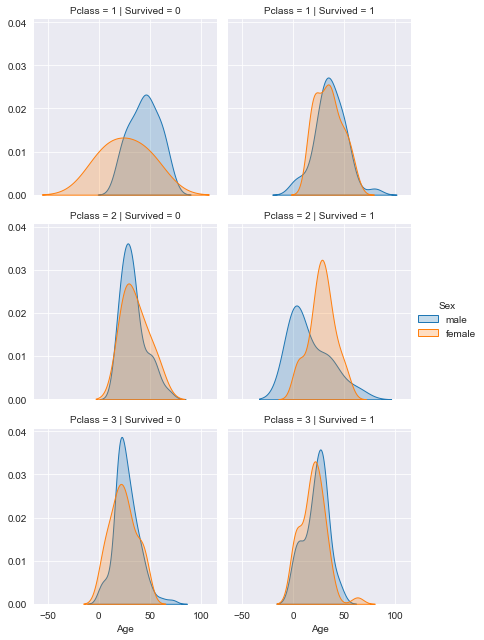

In [26]:
g = sns.FacetGrid(titanic, col='Survived', row='Pclass', hue='Sex', height=3)
g.map(sns.kdeplot, 'Age', shade=True)
g.add_legend()
sns.despine(left=True, bottom=True)
plt.show()